In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\91986\OneDrive\Desktop\E-comCustomerSegmentation\data\cleaned_data.csv')

In [6]:
product_sales = df.groupby(['ProductNo', 'ProductName']).agg({
    'Price': 'sum',
    'Quantity': 'sum',
    'TransactionNo': 'nunique' 
}).reset_index()

In [8]:
product_sales = product_sales.sort_values('Price', ascending=False)

In [ ]:
product_sales['Cumulative_Revenue'] = product_sales['Price'].cumsum()
product_sales['Revenue_Percent'] = product_sales['Cumulative_Revenue'] / product_sales['Price'].sum() * 100

In [10]:
product_sales.head(10)

,ProductNo,ProductName,Price,Quantity,TransactionNo
1295,22423,Regency Cakestand 3 Tier,47122.40,13890,1989
3271,85123A,Cream Hanging Heart T-Light Holder,30552.41,37956,2269
2642,47566,Party Bunting,27065.47,18308,1687
1515,22655,Vintage Red Kitchen Cabinet,23715.04,60,38
1578,22720,Set Of 3 Cake Tins Pantry Design,21808.06,7493,1385
2123,23298,Spotty Bunting,17878.12,8474,1146
3095,84879,Assorted Colour Bird Ornament,17352.65,36493,1457
1809,22960,Jam Making Set With Jars,16915.70,8717,1133
1328,22457,Natural Slate Heart Chalkboard,16883.38,9172,1249
1094,22197,Popcorn Holder,15396.65,56921,1392


Pareto Principle: Visualization

C:\Users\91986\AppData\Local\Temp\ipykernel_14444\3576287638.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


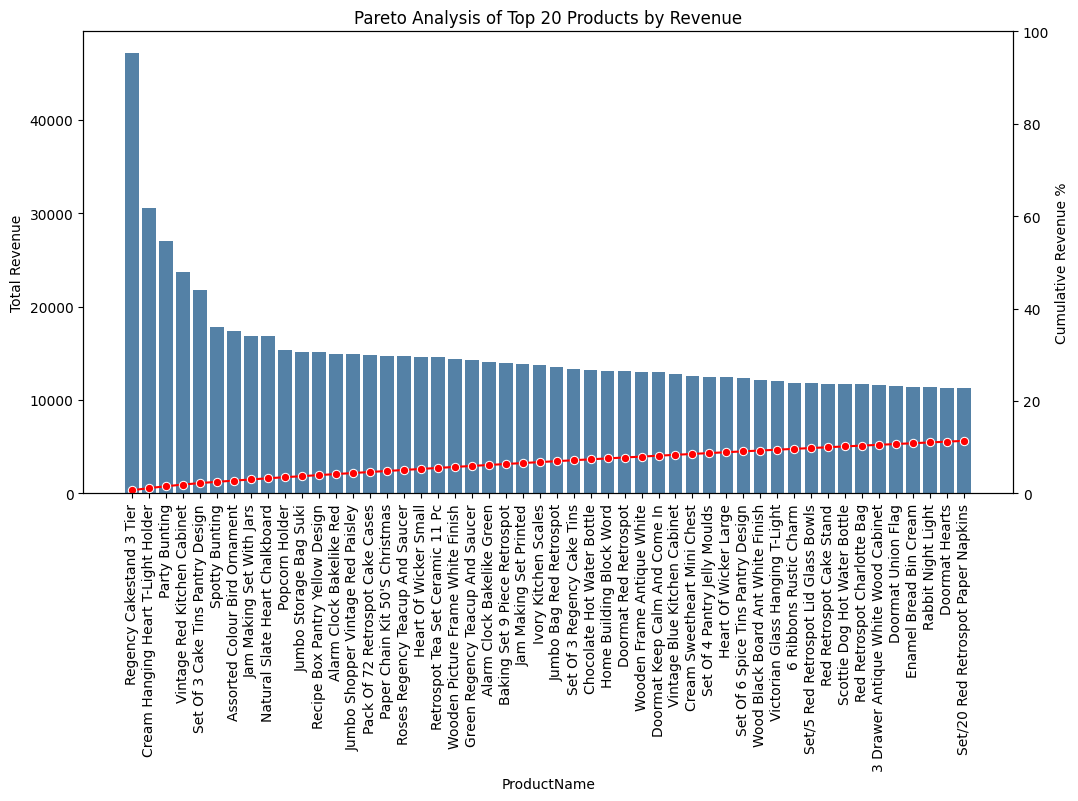

In [21]:
fig, ax1 = plt.subplots(figsize=(12, 6))
top_products = product_sales.head(50)
sns.barplot(data=top_products, x='ProductName', y='Price', ax=ax1, color='steelblue')
ax1.set_ylabel('Total Revenue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2 = ax1.twinx()

if 'Revenue_Percent' not in top_products.columns:
	prod = product_sales.sort_values('Price', ascending=False).copy()
	prod['Cumulative_Revenue'] = prod['Price'].cumsum()
	prod['Revenue_Percent'] = prod['Cumulative_Revenue'] / prod['Price'].sum() * 100
	top_products = top_products.merge(prod[['ProductNo', 'Revenue_Percent']], on='ProductNo', how='left')

sns.lineplot(data=top_products, x='ProductName', y='Revenue_Percent', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Cumulative Revenue %')
ax2.set_ylim(0, 100)

plt.title('Pareto Analysis of Top 20 Products by Revenue')
plt.show()



In [22]:
product_sales.head(10).to_csv("pareto_analysis_top_products.csv", index=False)